In [4]:
import pandas as pd
from sklearn.datasets import make_regression, make_classification
from sklearn.metrics import r2_score, accuracy_score, precision_score
# If AutoML is not installed, uncomment below to lines to allow for correct importy
import os
# os.chdir("..")
# import auto_regression #, AutomatedClassification

from automl import AutomatedRegression

In [5]:
import os
os.getcwd()

'/Users/opodriscoll/Documents/Scripts/AutoML/examples'

In [6]:
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=42)


df_X = pd.DataFrame(X)
# df_X['nine'] = pd.cut(df_X[9], bins=[-float('Inf'), -3, -1, 1, 3, float('Inf')], labels=['a', 'b', 'c', 'd', 'e'])
# df_X['ten'] = pd.cut(df_X[9], bins=[-float('Inf'), -1, 1, float('Inf')], labels=['A', 'B', 'C'])
df_y = pd.Series(y)


# prepare Autoregression object
regression = AutomatedRegression(
    y=df_y,
    X=df_X,
    # pca_value=0.95,
    # spline_value= 2,
    # poly_value={'degree': 2, 'interaction_only': True},
    n_trial=2,
    # nominal_columns=['nine'],
    # ordinal_columns=['ten'],
    reload_study=True,
    reload_trial_cap=True,
    write_folder=f'{os.getcwd()}/testdir/tests',
    metric_optimise=r2_score,
    optimisation_direction='maximize',
    models_to_optimize=['lightgbm'],
    models_to_assess=[ 'lightgbm'], # 'lightgbm'
    boosted_early_stopping_rounds = 20,
    n_weak_models=3
    )

In [7]:
import time

start = time.time()
regression.apply()
end = time.time()
print(end - start)
regression.summary

[I 2024-01-27 19:22:08,172] A new study created in RDB with name: regression_lightgbm
[I 2024-01-27 19:22:08,426] Trial 0 finished with value: -0.006332451473217038 and parameters: {'scaler': 'minmax', 'objective': 'regression', 'max_depth': 5, 'n_estimators': 88, 'max_bin': 127, 'min_gain_to_split': 14.548647782429915, 'lambda_l1': 0.31044435499483225, 'lambda_l2': 8.148018307012941e-07, 'num_leaves': 48, 'feature_fraction': 0.2650640588680905, 'bagging_fraction': 0.373818018663584, 'bagging_freq': 4, 'min_child_samples': 44, 'random_state': 42, 'verbosity': -1, 'transformers': 'quantile_trans', 'n_quantiles': 600}. Best is trial 0 with value: -0.006332451473217038.
[I 2024-01-27 19:22:20,453] Trial 1 finished with value: 0.8232342310261768 and parameters: {'scaler': 'robust', 'objective': 'regression', 'max_depth': 6, 'n_estimators': 332, 'max_bin': 255, 'min_gain_to_split': 14.233283058799998, 'lambda_l1': 4.905556676028774, 'lambda_l2': 0.18861495878553936, 'num_leaves': 79, 'featu

Number of unique weak models less than requested number of weak models: 1 < 3 
n_weak_models set to total number of weak models instead.
17.747334957122803


{'lightgbm_best': [[16.480807528099778, 1.2482363169981565],
  [0.8595976344466905, 0.029122773463518388]],
 'lightgbm_0': [[41.51331282021708, 7.076155625183258],
  [0.042570319994079744, 0.07338878093555949]],
 'stacked': [[14.095322372794737, 1.3280126358439877],
  [0.8981102268694423, 0.026385199486071938]]}

Clustering...


Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Calculating Shapely values...


100%|██████████| 200/200 [02:29<00:00,  1.34it/s]


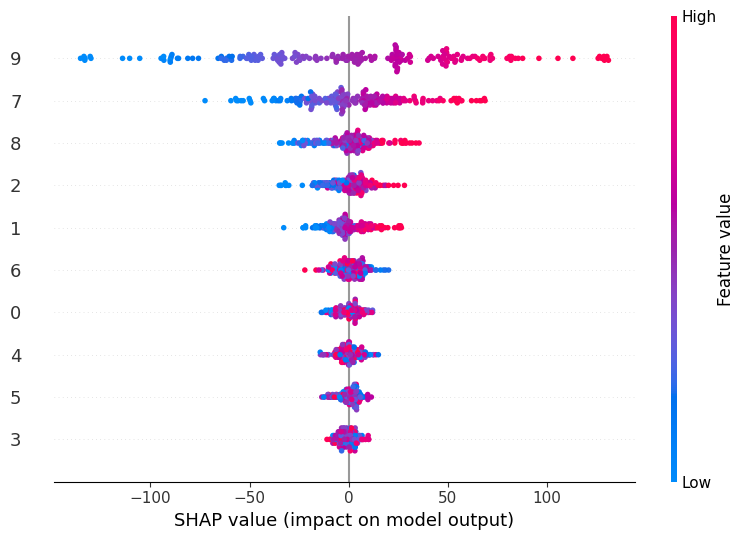

(            0          1          2         3          4          5  \
 0    3.531474   0.968759   1.590059 -4.601834  -5.582879  -0.198578   
 1   -1.960992  -0.916775   5.539727  5.969616   2.020367  -2.463925   
 2   -2.310252  -1.328445  16.015068 -2.212368   5.273821  -9.423237   
 3   -7.289884  -3.047269  -5.626429 -0.898644  -3.137237   0.513184   
 4   -0.057781  -1.020304  -2.175791 -3.662325   4.249455 -10.464936   
 ..        ...        ...        ...       ...        ...        ...   
 195  0.418938  -7.564295  -3.645986 -7.925190  -2.040300  -0.297116   
 196  1.953853  14.547473   4.263562  4.557285  10.366055  -1.781714   
 197 -4.572566  -2.062785   6.189941 -6.704816   5.648371   0.738513   
 198  5.428884   0.769372   9.871742  0.861325   3.817307  -0.225379   
 199  0.250619   8.406536   5.357850 -4.061539   6.678279   1.205504   
 
              6          7          8           9  
 0    -3.203742 -43.008147 -17.766459  -44.426822  
 1    20.223356  14.792658  17

In [8]:
regression.model_feature_importance()